# Laboratorium 10.
## Dyskretna Transformacja Fouriera

### 1. FFT

Ważne żeby wektor próbek wejściowych miał rozmiar $N = 2^k$ gdzie k to dowolna liczba naturalna. 

Do obliczenia tego w czasie O(nlogn), został wykorzystany algorytm [Cooley–Tukey'a](https://en.wikipedia.org/wiki/Cooley–Tukey_FFT_algorithm) (zrobienie tego jako iloczym macierzy Fouriera zostawiamy czytelnikowi jako zadanie domowe 😉). Stosuje on metode dziel i zwyciężaj aby szybciej przekształcić tą macierz.

In [63]:
import cmath

def my_fft(x, N):
    if N == 1:
        return x
    X_even = my_fft(x[::2], N//2)
    X_odd = my_fft(x[1::2], N//2)
    X = [0] * N
    k = 0
    while k < N/2:
        twiddle = cmath.exp(-2j * cmath.pi * k / N) * X_odd[k]
        X[k] = X_even[k] + twiddle
        X[k + N//2] = X_even[k] - twiddle
        k += 1
    
    return X

### 1.2 IDFT

korzystając z zależności

$$
F_n^{-1}y = \frac{\overline{F}_ny}{n} = \frac{\overline{F_ny}}{n}
$$

Możemy zaimplementowac IDFT

In [ ]:
import numpy as np
def my_idft(y, N):
    Y_conjugate = [np.conj(y_k) for y_k in y]
    X_conjugate = my_fft(Y_conjugate, N)
    result = [np.conj(x_k) / N for x_k in X_conjugate]
    return [c.real for c in result]

### 1.3 Testy

In [ ]:
import scipy.fft as fft

def print_complex_array(arr):
    return '[ ' + '\n  '.join(f'{c.real:8.5f} {c.imag:+8.5f}j' for c in arr) + ' ]'
    
input_array = [2,45,6,1,0,43,1,2] #must be a power of 2!!!!!

lib = fft.fft(input_array,8)

my = my_fft(input_array,8)

print(f"lib:\n{print_complex_array(lib)} \nvs\nmy:\n{print_complex_array(my)}")

my_back = my_idft(my,8)
print(f"before anything: \n{input_array}\nafter dft and idft:\n{my_back}")

lib:
[ 100.00000 -0.00000j
   4.12132 -5.70711j
  -5.00000 -85.00000j
  -0.12132 +4.29289j
  -82.00000 -0.00000j
  -0.12132 -4.29289j
  -5.00000 +85.00000j
   4.12132 +5.70711j ] 
vs
my:
[ 100.00000 +0.00000j
   4.12132 -5.70711j
  -5.00000 -85.00000j
  -0.12132 +4.29289j
  -82.00000 +0.00000j
  -0.12132 -4.29289j
  -5.00000 +85.00000j
   4.12132 +5.70711j ]
before anything: 
[2, 45, 6, 1, 0, 43, 1, 2]
after dft and idft:
[2.0, 45.0, 6.0, 1.0, 0.0, 43.0, 1.0, 2.0]


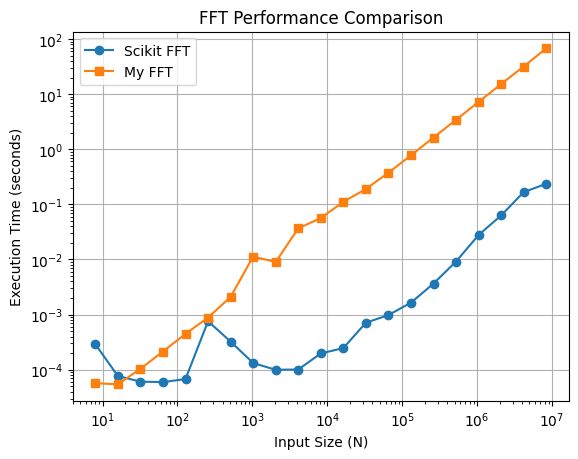

In [73]:
import matplotlib.pyplot as plt
import time

# speed test
sizes = [2**i for i in range(3,24)]
lib_times = []
my_times = []
for N in sizes:
    arr = np.random.randint(1,100,N)

    start_time = time.time()
    fft.fft(arr,N)
    end_time = time.time()
    lib_times.append(end_time-start_time)

    start_time = time.time()
    my_fft(arr,N)
    end_time = time.time()
    my_times.append(end_time-start_time)


plt.plot(sizes, lib_times, label='Scikit FFT', marker='o')
plt.plot(sizes, my_times, label='My FFT', marker='s')
plt.xlabel('Input Size (N)')
plt.ylabel('Execution Time (seconds)')
plt.title('FFT Performance Comparison')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

hej! Tylko **100 razy** wolniejsze heh

### 2. DFT w 1D

Zostaną użyte funkcje biblioteczne poneiważ są szybsze, a w poprzednim zadaniu zostało pokazane że zwracają te same wyniki.

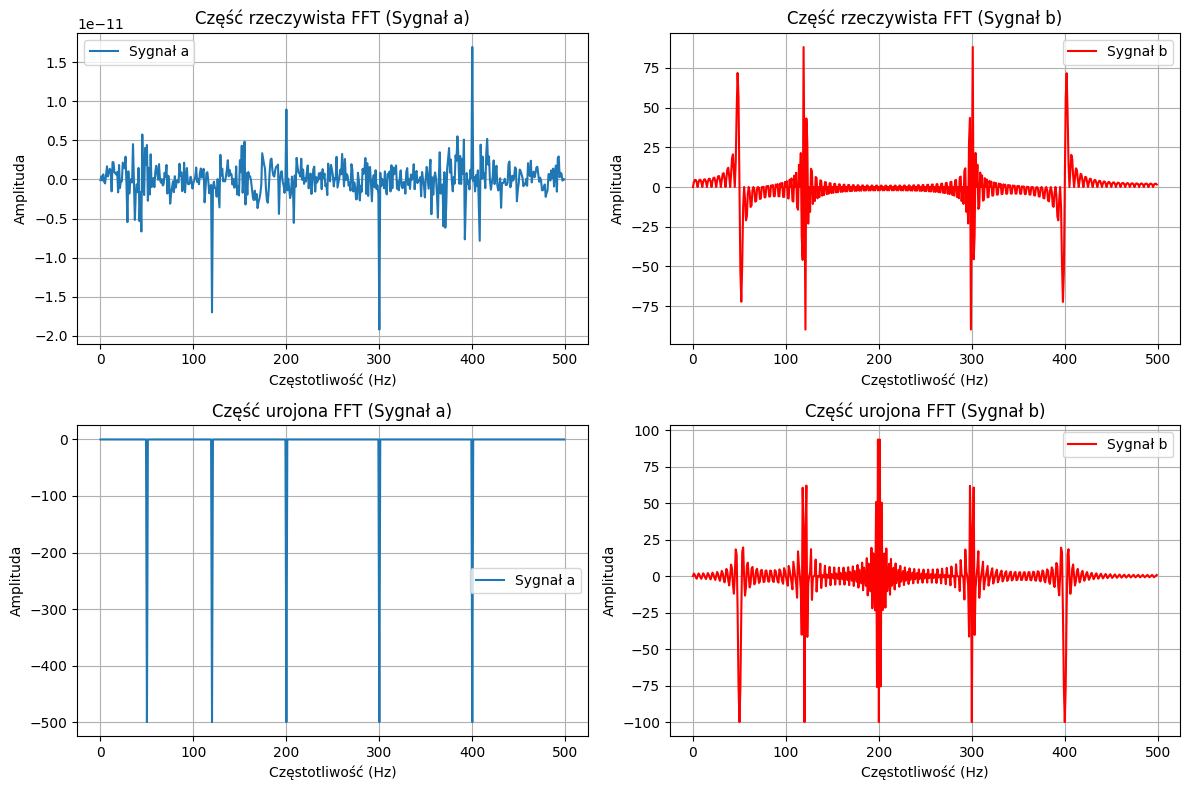

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq


fs = 1000  # Częstotliwość próbkowania (Hz)
T = 1  # Czas trwania sygnału (s)
N = fs * T 
t = np.linspace(0, T, N, endpoint=False) 

freqs = [50, 120, 200, 300, 400]  

# a)
signal_a = sum(np.sin(2 * np.pi * f * t) for f in freqs)

#b)
signal_b = np.zeros_like(t)
segment_length = N // len(freqs)

for i, f in enumerate(freqs):
    start, end = i * segment_length, (i + 1) * segment_length
    signal_b[start:end] = np.sin(2 * np.pi * f * t[start:end])

fft_a = fft(signal_a)
fft_b = fft(signal_b)
freqs_fft = fftfreq(N, 1/fs)

real_a, imag_a = np.real(fft_a), np.imag(fft_a)
real_b, imag_b = np.real(fft_b), np.imag(fft_b)

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].plot(freqs_fft[:N//2], real_a[:N//2], label="Sygnał a")
axs[0, 0].set_title("Część rzeczywista FFT (Sygnał a)")
axs[0, 1].plot(freqs_fft[:N//2], real_b[:N//2], label="Sygnał b", color='r')
axs[0, 1].set_title("Część rzeczywista FFT (Sygnał b)")

axs[1, 0].plot(freqs_fft[:N//2], imag_a[:N//2], label="Sygnał a")
axs[1, 0].set_title("Część urojona FFT (Sygnał a)")
axs[1, 1].plot(freqs_fft[:N//2], imag_b[:N//2], label="Sygnał b", color='r')
axs[1, 1].set_title("Część urojona FFT (Sygnał b)")

for ax in axs.flat:
    ax.set_xlabel("Częstotliwość (Hz)")
    ax.set_ylabel("Amplituda")
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.show()
